In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [3]:
features = ["current_player_score",
            "opponent_score",
            "current_player_deadwood",
            "current_player_num_hit_cards",
            # alpha to here                 features[:4]
            "num_melds",
            "point_sum_melds",
            "num_combos",
            "point_sum_combos",
            "num_knock_cache",
            "point_sum_knock_cache",
            "num_load_cards",
            "point_sum_load_cards",
            "turns_taken"
            # beta to here                 features[:13]
           ]

In [52]:
df = pd.read_csv('alpha-8.csv')
df

# np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values[0:20]

,current_player,is_current_player_hand_winner,is_current_player_game_winner,current_player_score,opponent_score,current_player_deadwood,current_player_num_hit_cards,num_melds,point_sum_melds,num_combos,point_sum_combos,num_knock_cache,point_sum_knock_cache,num_load_cards,point_sum_load_cards,turns_taken
0,0.0,1,0,0.0,0.0,52.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0,1,0.0,0.0,63.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1,0,0.0,0.0,52.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1,0,0.0,0.0,54.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1,0,0.0,0.0,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202017,0.0,0,0,0.0,95.0,13.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202018,1.0,1,1,95.0,0.0,13.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202019,1.0,1,1,95.0,0.0,13.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202020,1.0,1,1,95.0,0.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['current_player_score', 'opponent_score', 'current_player_deadwood', 'current_player_num_hit_cards'] 

CSV LINE:

0.5704254024,0.0066719332,-0.0066250359,-0.0018678181,0.0002306692


R^2:   0.20326884236552067 




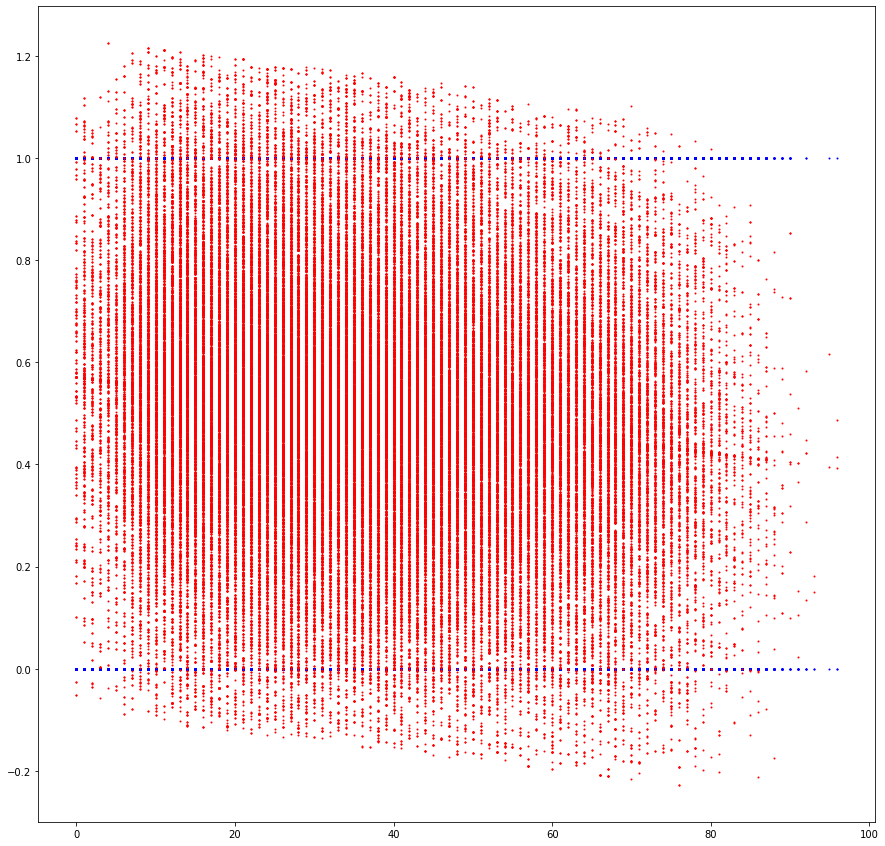

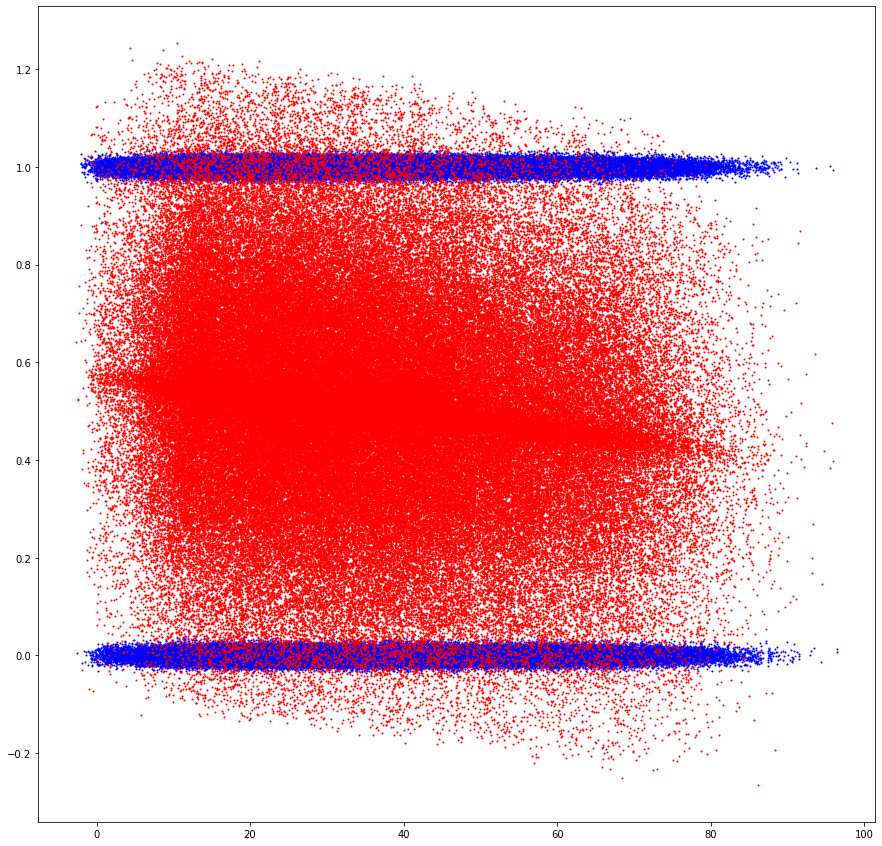

In [53]:
f = features[:4]

print(f, "\n")

X = df[f]
y = df[["is_current_player_game_winner"]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
print(",".join('{0:.10f}'.format(num) for num in np.hstack((linear_regressor.intercept_,linear_regressor.coef_[0]))) + "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)



var = "current_player_deadwood"

fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

CSV LINE:

0.6341448776,0.0094125599,-0.0088774218,-0.0029742612,-0.0091639111


R^2:   0.7074105994716793 




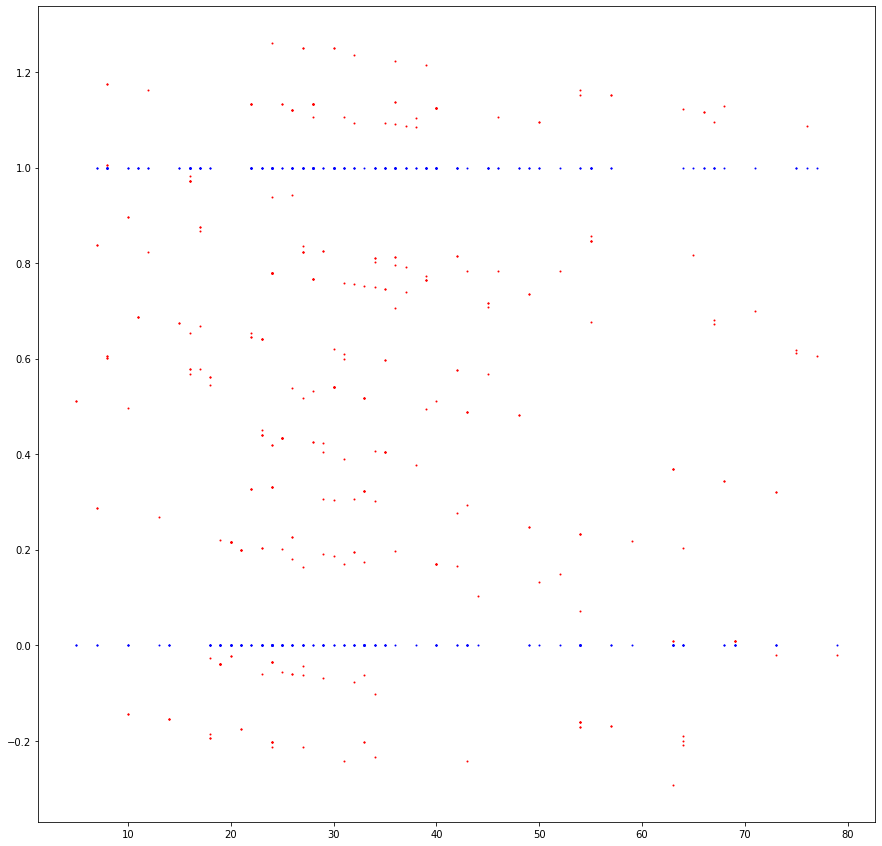

In [18]:
df = pd.read_csv('alpha-6.csv')
df

X = df[features[:4]]
y = df[["is_current_player_game_winner"]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
print(",".join('{0:.10f}'.format(num) for num in np.hstack((linear_regressor.intercept_,linear_regressor.coef_[0]))) + "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)



var = "current_player_deadwood"

fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


# def jitter(arr):
#     stdev = 0.01 * (max(arr) - min(arr))
#     return arr + np.random.randn(len(arr)) * stdev

# fig = plt.figure(figsize=(15,15))
# plt.xticks(range(0,200,20))
# plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
# plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
# plt.show()

# logistic

In [22]:
X = df[["current_player_score","opponent_score","current_player_deadwood","current_player_num_hit_cards","num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"]]
y = df[["is_current_player_game_winner"]]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
model = LogisticRegression().fit(X_train, y_train.values.T[0])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
predictions = model.predict(X_test)

In [19]:
predictions

array([1, 1, 0, ..., 0, 0, 0])

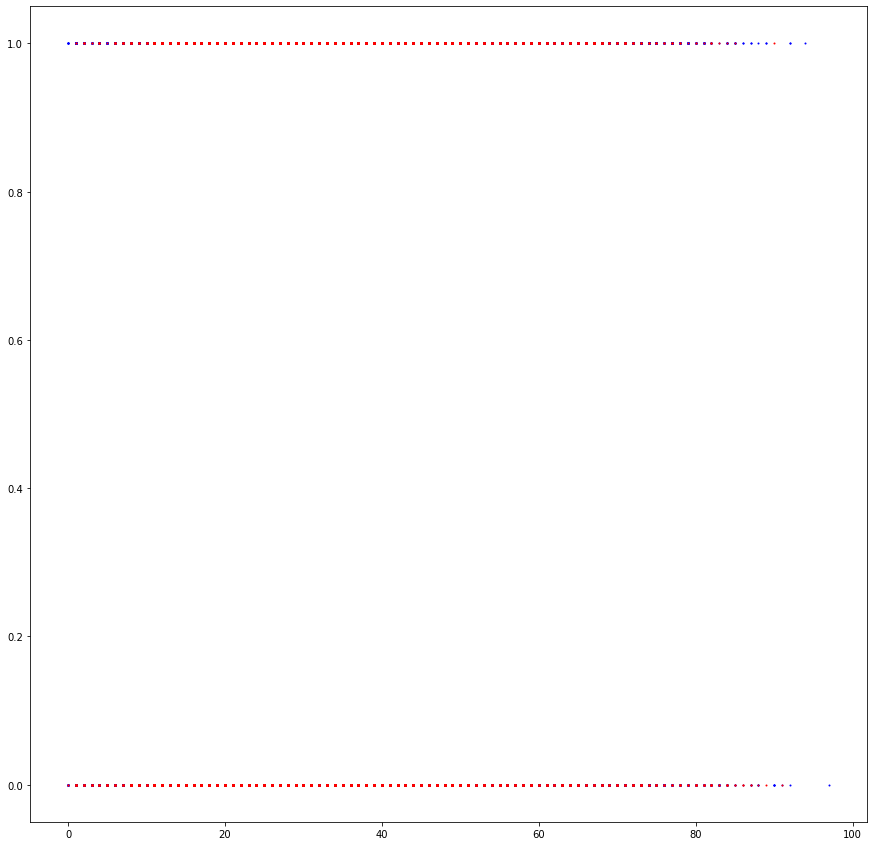

In [20]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

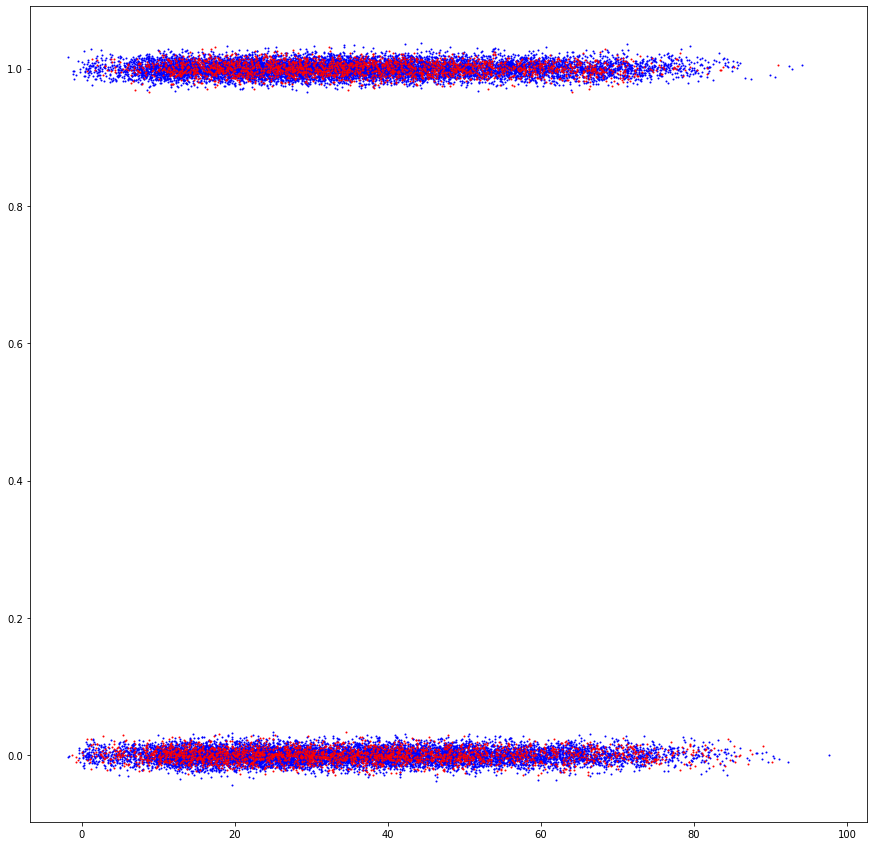

In [21]:
fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()